In [1]:
from pynq import Overlay
bareHDMI = Overlay("/usr/local/lib/python3.6/dist-packages/"
               "pynq_cv/overlays/xv2Filter2DDilate.bit")
import pynq_cv.overlays.xv2Filter2DDilate as xv2

# Load xlnk memory mangager
from pynq import Xlnk
Xlnk.set_allocator_library("/usr/local/lib/python3.6/dist-packages/"
                           "pynq_cv/overlays/xv2Filter2DDilate.so")

mem_manager = Xlnk()

In [1]:
from pynq.lib.video import *
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")
hdmi_in = base.video.hdmi_in

In [4]:
hdmi_in.configure(PIXEL_GRAY)
hdmi_in.start()

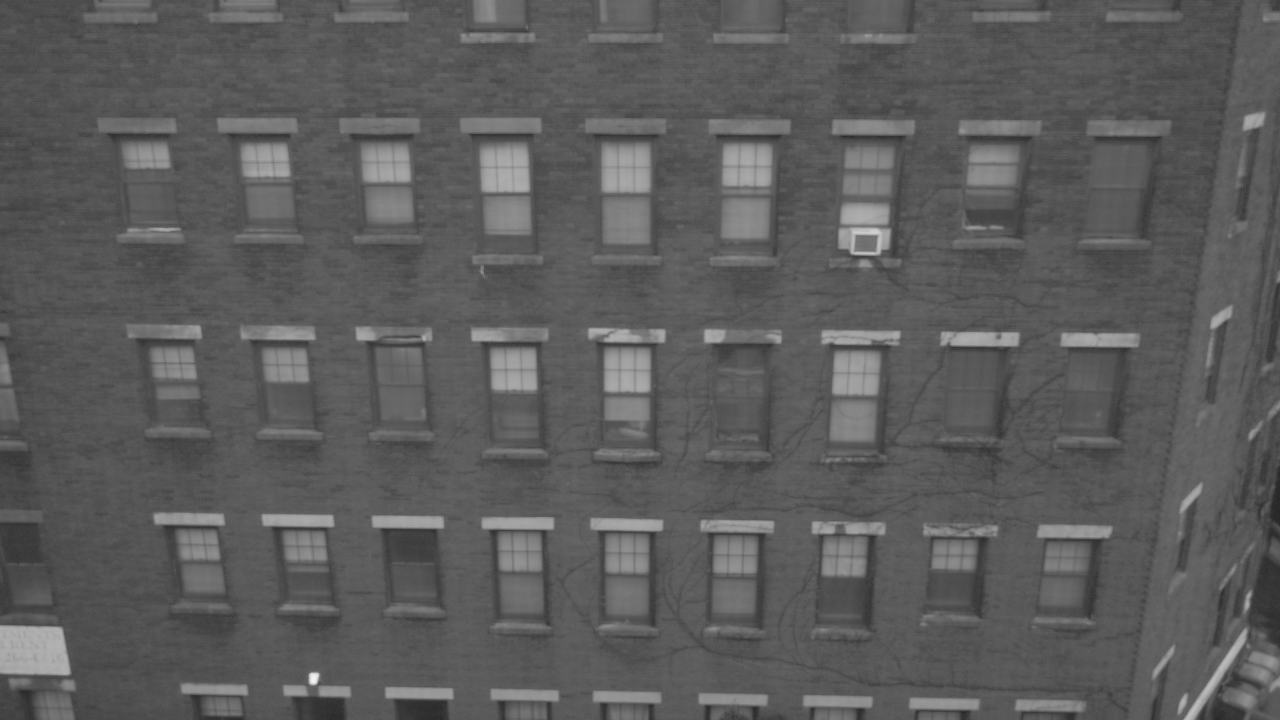

In [6]:
import PIL.Image
frame = hdmi_in.readframe()
img = PIL.Image.fromarray(frame)
img.save('test.jpg')
img

In [9]:
print(frame.shape)
print(type(frame))

(720, 1280)
<class 'pynq.buffer.PynqBuffer'>


In [38]:
import pynq.buffer as pb
import random as rand
import numpy as np

my_buf = pb.allocate(frame.shape, dtype=np.uint8)
y, x = frame.shape

# generate random noise
for i in range(y):
    for j in range(x):
        my_buf[i, j] = np.random.randint(0, 256)
        

In [39]:
print(my_buf.shape)
print(type(my_buf))
my_buf

(720, 1280)
<class 'pynq.buffer.PynqBuffer'>


PynqBuffer([[ 50,  91, 228, ...,  79, 237, 194],
            [193,  83,  37, ..., 160,   4, 121],
            [153,  89,  36, ..., 140, 156,  78],
            ...,
            [ 42, 239,  29, ...,  32,  63,  72],
            [ 19, 208,  47, ..., 208,  13, 181],
            [130, 212, 217, ...,  60,   3,  40]], dtype=uint8)

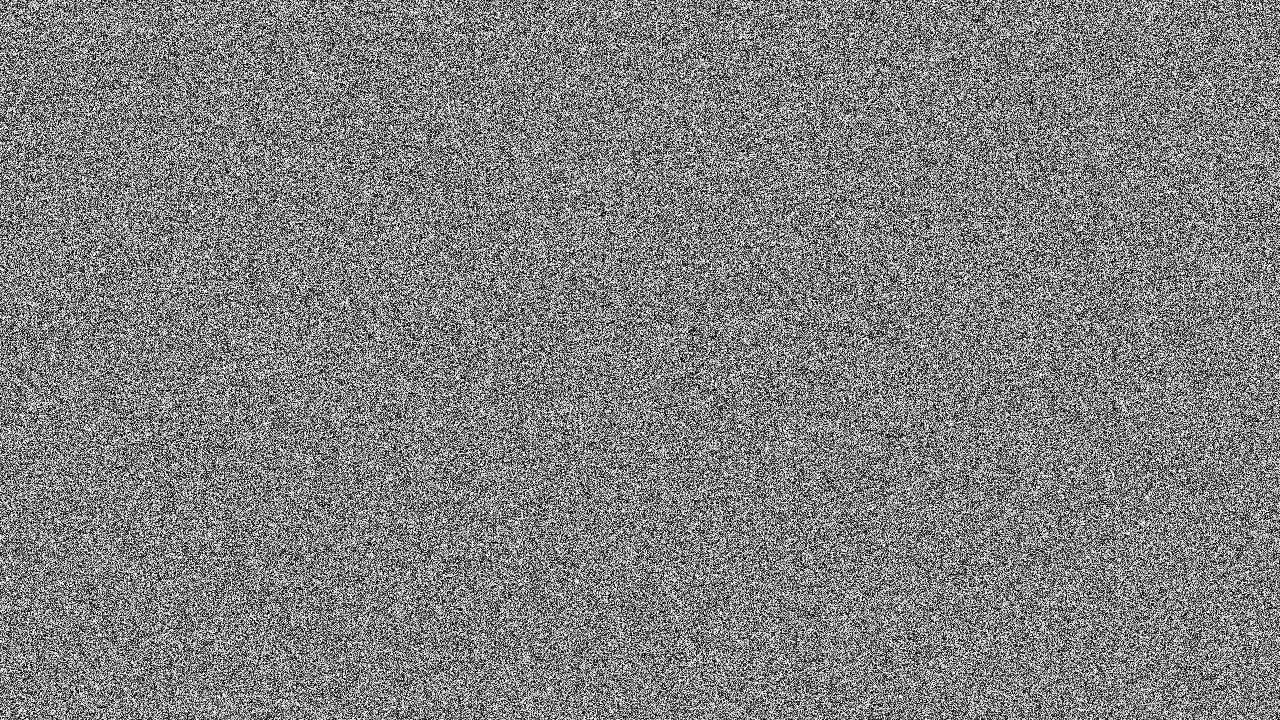

In [40]:
img = PIL.Image.fromarray(my_buf)
img